In [1]:
# Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read The Data

df = pd.read_csv('InsuranceData.csv')
# drop columns
#df.drop(['Unnamed: 0','Customer Id'], axis=1, inplace=True)

#df.reset_index(drop=True, inplace=True)

In [3]:
df.head()

,Unnamed: 0,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0.0
1,1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0.0
2,2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0.0
3,3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0.0
4,4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0.0


In [4]:
# Remove unnamed and customer column
df.drop(['Unnamed: 0','Customer Id'], axis=1, inplace=True)

df.reset_index(drop=True, inplace=True)

In [14]:
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0.0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0.0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0.0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0.0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0.0


In [6]:
df.shape

(10229, 13)

**EXPLORATION DATA ANALYSIS**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   10229 non-null  int64  
 1   Insured_Period      10229 non-null  float64
 2   Residential         10229 non-null  int64  
 3   Building_Painted    10229 non-null  object 
 4   Building_Fenced     10229 non-null  object 
 5   Garden              10218 non-null  object 
 6   Settlement          10229 non-null  object 
 7   Building Dimension  10110 non-null  float64
 8   Building_Type       10229 non-null  int64  
 9   Date_of_Occupancy   8993 non-null   float64
 10  NumberOfWindows     10229 non-null  object 
 11  Geo_Code            10114 non-null  object 
 12  Claim               7160 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.0+ MB


In [6]:
# Data Statistics 
print(f'Data Shape : \t {df.shape} \n')
print(f'% Of NAN Values :\n \n{df.isna().sum()/len(df)*100}\n')
print(f'Sum Of Duplicate Values :\t {df.duplicated().sum()}')

Data Shape : 	 (10229, 13) 

% Of NAN Values :
 
YearOfObservation      0.000000
Insured_Period         0.000000
Residential            0.000000
Building_Painted       0.000000
Building_Fenced        0.000000
Garden                 0.107537
Settlement             0.000000
Building Dimension     1.163359
Building_Type          0.000000
Date_of_Occupancy     12.083293
NumberOfWindows        0.000000
Geo_Code               1.124255
Claim                 30.002933
dtype: float64

Sum Of Duplicate Values :	 34


In [7]:
df.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,10229.000000,10229.000000,10229.000000,10110.000000,10229.000000,8993.000000,7160.000000
mean,2013.646789,0.913672,0.281064,1818.152918,2.238049,1965.061715,0.228212
std,1.380660,0.233806,0.449540,2272.111284,0.961589,33.548619,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,1.000000,0.000000,500.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1002.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2190.000000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,30745.000000,4.000000,2016.000000,1.000000


**DATA ENGINEERING**

In [34]:
# Rename Columns 
# df.rename({'Insured_Period':'Insurance Period', 'Building_Type':'Building Type', 'Date_of_Occupancy':'Date Of Occupancy'},
#          axis=1, inplace=True)

In [33]:
df.head()

,YearOfObservation,Insurance Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building Type,Date Of Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,6 Months - 1 Year,0,Painted,V,V,U,290.0,1,1960.0,.,1053,0.0
1,2015,6 Months - 1 Year,0,Not Painted,N,O,R,490.0,1,1850.0,4,1053,0.0
2,2014,6 Months - 1 Year,0,Painted,V,V,U,595.0,1,1960.0,.,1053,0.0
3,2013,6 Months - 1 Year,0,Not Painted,V,V,U,2840.0,1,1960.0,.,1053,0.0
4,2014,6 Months - 1 Year,0,Not Painted,N,O,R,680.0,1,1800.0,3,1053,0.0


In [5]:
# Type Conversion
df['Insured_Period'] = pd.to_numeric(df['Insured_Period'])

# Filtering
dfLess50Percent = df[df['Insured_Period'] <= 0.50]
dfOver50Percent = df[df['Insured_Period'] > 0.50]

# Values Replacement
df['Insured_Period'].replace(dfLess50Percent['Insured_Period'].values, "0 - 5 Months", inplace=True)
df['Insured_Period'].replace(dfOver50Percent['Insured_Period'].values, "6 Months - 1 Year", inplace=True)

# Unique Values
df['Insured_Period'].unique()

array(['6 Months - 1 Year', '0 - 5 Months'], dtype=object)

In [6]:
df['YearOfObservation'].unique()

array([2013, 2015, 2014, 2012, 2016], dtype=int64)

In [7]:
# Replace (N-Painted, V-Not Painted)
df['Building_Painted'].replace('N', 'Painted', inplace=True)
df['Building_Painted'].replace('V', 'Not Painted', inplace=True)

In [8]:
# Replace (V-has garden; O-no garden)
df['Garden'].replace('V', 'Has Garden', inplace=True)
df['Garden'].replace('O', 'No Garden', inplace=True)

In [9]:
# Replace (N-Fenced, V-Not Fenced)
df['Building_Fenced'].replace({'N':'Fenced','V':'Not Fenced'},inplace=True)

In [10]:
# Replace (R- rural area; U- urban area)
df['Settlement'].replace({'R': 'Rural area','U': 'Urban area'},inplace=True)

In [11]:
#  Rename columns
df.rename({'Insured_Period':'Insurance Period', 
           'Building_Type':'Building Type', 
           'Building_Painted': 'Building Painted',
           'Building_Fenced' : 'Building Fenced',
           'NumberOfWindows' : 'Number of Windows',
           'Geo_Code': 'Geo Code',
           'Date_of_Occupancy':'Date Of Occupancy',
           'YearOfObservation':'Year of Observation'},
          axis=1, inplace=True)

In [12]:
df['Number of Windows'].unique()

array(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

In [13]:
# Replace incosistent '  .' with 0 and '>=10' with 10
df['Number of Windows'].replace({'   .':0, '>=10':10}, inplace=True)

# change to dtype to int64
df['Number of Windows'] = df['Number of Windows'].astype('int64')

In [14]:
df.head()

,Year of Observation,Insurance Period,Residential,Building Painted,Building Fenced,Garden,Settlement,Building Dimension,Building Type,Date Of Occupancy,Number of Windows,Geo Code,Claim
0,2013,6 Months - 1 Year,0,Painted,Not Fenced,Has Garden,Urban area,290.0,1,1960.0,0,1053,0.0
1,2015,6 Months - 1 Year,0,Not Painted,Fenced,No Garden,Rural area,490.0,1,1850.0,4,1053,0.0
2,2014,6 Months - 1 Year,0,Painted,Not Fenced,Has Garden,Urban area,595.0,1,1960.0,0,1053,0.0
3,2013,6 Months - 1 Year,0,Not Painted,Not Fenced,Has Garden,Urban area,2840.0,1,1960.0,0,1053,0.0
4,2014,6 Months - 1 Year,0,Not Painted,Fenced,No Garden,Rural area,680.0,1,1800.0,3,1053,0.0


In [15]:
df['Date Of Occupancy'].isna().sum()

1236

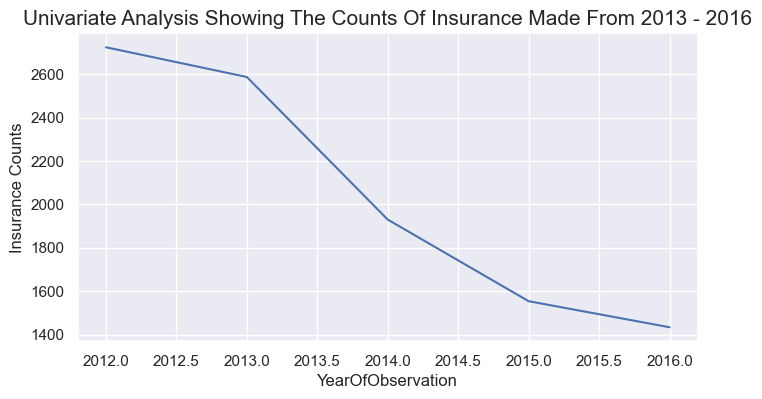

In [16]:
yearByInsuredPeriod = df.groupby('Year of Observation')['Year of Observation'].count().sort_values(ascending=False)

sns.set_theme(font_scale=1.0)
plt.figure(figsize=(8,4))
plt.title('Univariate Analysis Showing The Counts Of Insurance Made From 2013 - 2016', fontsize=15)
plt.ylabel("Insurance Counts")
sns.lineplot(x=yearByInsuredPeriod.index, y=yearByInsuredPeriod.values);

plt.savefig('figures\CountsOfInsuranceMade')

In [17]:
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,6 Months - 1 Year,0,N,V,V,U,290.0,1,1960.0,.,1053,0.0
1,2015,6 Months - 1 Year,0,V,N,O,R,490.0,1,1850.0,4,1053,0.0
2,2014,6 Months - 1 Year,0,N,V,V,U,595.0,1,1960.0,.,1053,0.0
3,2013,6 Months - 1 Year,0,V,V,V,U,2840.0,1,1960.0,.,1053,0.0
4,2014,6 Months - 1 Year,0,V,N,O,R,680.0,1,1800.0,3,1053,0.0


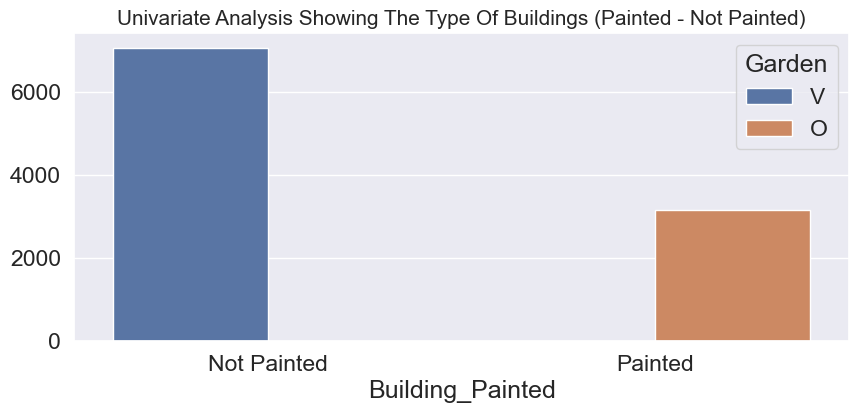

In [50]:
# Replace Painted - Not Painted Buildings
df['Building_Painted'].replace('N', 'Painted', inplace=True)
df['Building_Painted'].replace('V', 'Not Painted', inplace=True)

residentialBuilding = df.groupby('Building_Painted')['Building_Painted'].count().sort_values(ascending=False)
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,4))
sns.barplot(x = residentialBuilding.index, 
            y = residentialBuilding.values,hue=garden.index).set_title("Univariate Analysis Showing The Type Of Buildings (Painted - Not Painted)",
                                                     fontsize=15);
# plt.legend()
plt.savefig('figures/residentialBuildingCOunts')

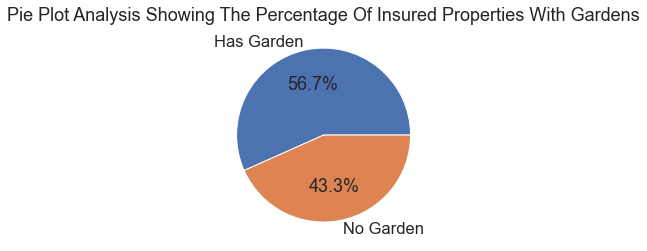

In [16]:
# Replace Painted - Not Painted Buildings
df['Garden'].replace('V', 'Has Garden', inplace=True)
df['Garden'].replace('O', 'No Garden', inplace=True)

# Garden Groupby
garden = df.groupby('Garden').Garden.count().sort_values(ascending=False)

plt.figure(figsize=(9,4))
sns.set_theme(font_scale=1.5);
plt.pie(garden, labels=garden.index, autopct='%1.1f%%');
plt.title("Pie Plot Analysis Showing The Percentage Of Insured Properties With Gardens");


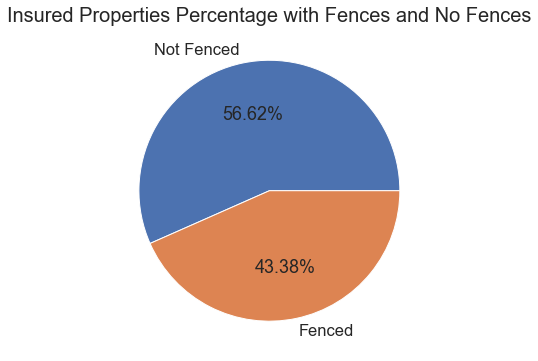

In [17]:
# plot a pie chart of insured properties with fence and without fence
Building_fenced = df['Building Fenced'].value_counts()

plt.figure(figsize=(9,6))
sns.set(font_scale=1.5)
plt.pie(Building_fenced.values, labels=Building_fenced.index, autopct= '%1.2f%%')
plt.title('Insured Properties Percentage with Fences and No Fences',fontsize = 20)

plt.show()

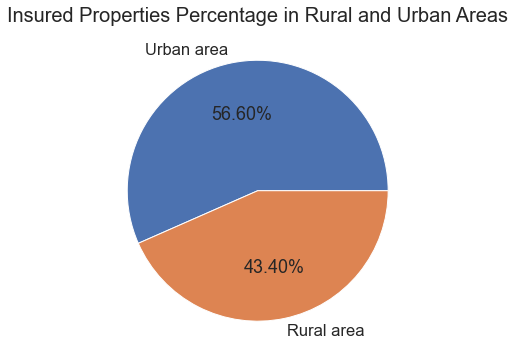

In [18]:
# plot a pie chart of insured properties with fence and without fence
Settlement = df['Settlement'].value_counts()

plt.figure(figsize=(9,6))
sns.set(font_scale=1.5)
plt.pie(Settlement.values, labels=Settlement.index, autopct= '%1.2f%%')
plt.title('Insured Properties Percentage in Rural and Urban Areas',fontsize = 20)

plt.show()

In [19]:
# plot insured period of residential and non residential properties 

Groupby = pd.DataFrame(df.groupby('Insurance Period')['Residential'].value_counts(),
                      
                      )
Groupby.rename(columns={'Residential':'Counts'},inplace=True)
Groupby.reset_index(inplace=True)

residential = Groupby[Groupby['Residential'] == 1]
non_residential = Groupby[Groupby['Residential'] == 0]


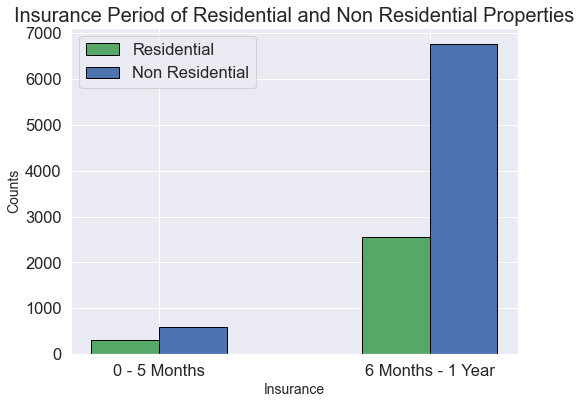

In [20]:
n = len(residential['Counts'])
r = np.arange(n)
width = 0.25

plt.figure(figsize=(8,6))
sns.set_theme(font_scale=1.5)
plt.bar(r,residential['Counts'], color='g',
       width = width, edgecolor = 'black',label='Residential')
plt.bar(r + width,non_residential['Counts'], color='b',
       width = width, edgecolor = 'black',label='Non Residential')

plt.xlabel('Insurance',fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Insurance Period of Residential and Non Residential Properties',fontsize = 20)

plt.xticks(r + width/2,['0 - 5 Months','6 Months - 1 Year'])
plt.legend()

plt.show()

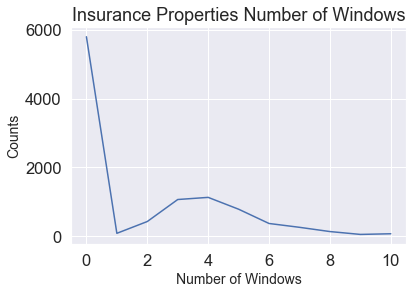

In [21]:
# Plot the insurance properties number of windows 

number_of_windows = df['Number of Windows'].value_counts()

sns.lineplot(x= number_of_windows.index , y= number_of_windows.values)
plt.xlabel('Number of Windows',fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Insurance Properties Number of Windows')

plt.show()

In [ ]:
# Scatter plot of the building dimensions of insrance properties in years of observation 
# Also between rural and urban areas 


plt.figure(figsize=(10,6))
sns.swarmplot(data=df,  x='Settlement', y= 'Building Dimension')

In [ ]:
sns.histplot(df['Date_of_Occupancy'])

**SUMMARY**

1. 

**DATA PREPROCESSING**